In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_csv("IRIS.csv")

In [3]:
iris

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [4]:
iris["Species"].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

C:\Users\svish\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


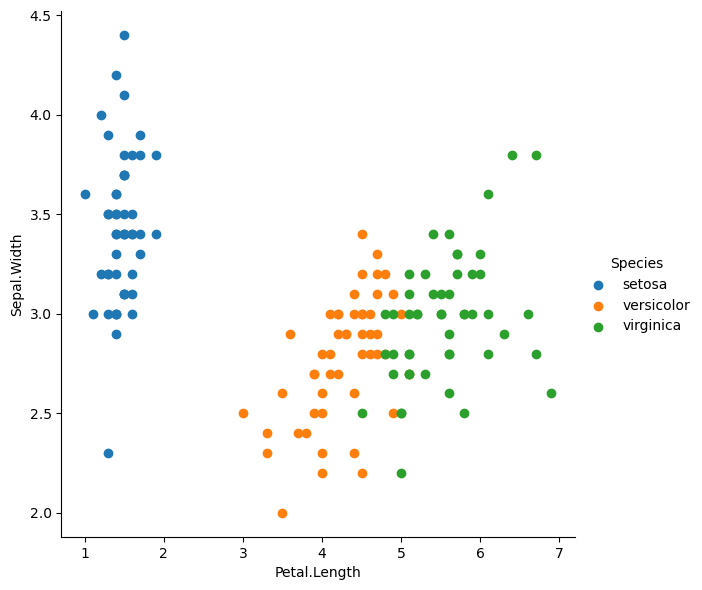

In [5]:
sns.FacetGrid(iris, hue="Species",height=6).map(plt.scatter, "Petal.Length", "Sepal.Width").add_legend()

In [6]:
flower_mapping = {'setosa': 0,'versicolor': 1,'virginica':2}
iris["Species"] = iris["Species"].map(flower_mapping)

In [7]:
iris

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [17]:
iris.corr()

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
ID,1.000000,0.716676,-0.402301,0.882637,0.900027,0.942830
Sepal.Length,0.716676,1.000000,-0.117570,0.871754,0.817941,0.782561
Sepal.Width,-0.402301,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
Petal.Length,0.882637,0.871754,-0.428440,1.000000,0.962865,0.949035
Petal.Width,0.900027,0.817941,-0.366126,0.962865,1.000000,0.956547
Species,0.942830,0.782561,-0.426658,0.949035,0.956547,1.000000


<Axes: >

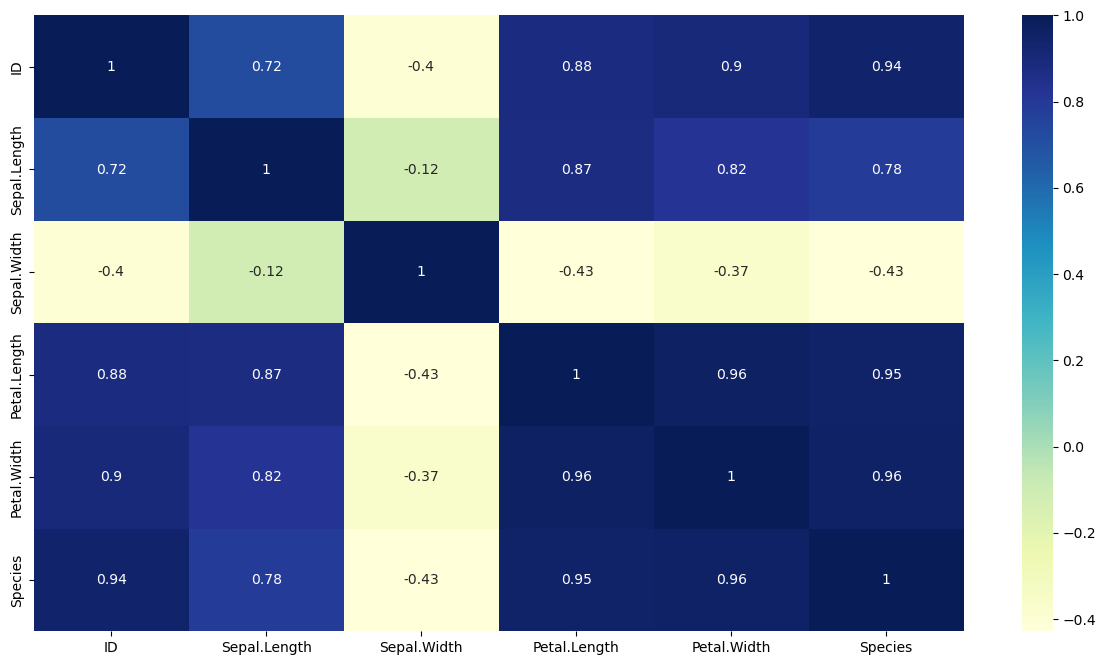

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(iris.corr(numeric_only = True), annot=True, cmap="YlGnBu")

In [8]:
x = iris.drop(['Species'],axis=1)
y = iris['Species']

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\svish\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
model.score(x_test,y_test)

1.0

In [20]:
from sklearn import metrics
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

